### How to download the dataset
    1- head to : https://databank.worldbank.org/reports.aspx?source=2&country=EGY#
    2- From the Database option select "World Development Indicators"
    3- From the Series option select the following :
        -Population, total
        -Population growth (annual %)	
        -GDP (current US)
        -GDP growth (annual %)
        -Inflation, GDP deflator (annual %)
        -Net migration
        -Official exchange rate (LCU per US, period average)
    4- From the Time option press "select all"
    5- Lastly download the data as a csv file

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("78c40789-3f7b-4537-ae95-08839ef7abc7_Data.csv")
df.columns = [col.split('[')[0].strip() for col in df.columns]
df.head()

,Country Name,Country Code,Series Name,Series Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"Egypt, Arab Rep.",EGY,"Population, total",SP.POP.TOTL,27034499,27747867,28485022,29245936,30026648,3.081847e+07,...,9.337789e+07,9.559232e+07,9.772380e+07,9.978403e+07,1.017894e+08,1.037408e+08,1.056187e+08,1.074651e+08,1.092622e+08,1.109901e+08
1,"Egypt, Arab Rep.",EGY,Population growth (annual %),SP.POP.GROW,..,2.60451812442641,2.62194328950544,2.63622185854676,2.63446301996047,2.602890e+00,...,2.315708e+00,2.343793e+00,2.205260e+00,2.086303e+00,1.989768e+00,1.898931e+00,1.794002e+00,1.733130e+00,1.658384e+00,1.569074e+00
2,"Egypt, Arab Rep.",EGY,GDP (current US$),NY.GDP.MKTP.CD,..,..,..,..,..,4.948668e+09,...,2.884341e+11,3.055954e+11,3.293666e+11,3.324417e+11,2.483628e+11,2.625886e+11,3.186788e+11,3.838178e+11,4.246718e+11,4.767477e+11
3,"Egypt, Arab Rep.",EGY,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,..,5.1611141431878,3.87561672366319,10.5180926175286,11.5075774740906,4.914042e+00,...,2.185466e+00,2.915912e+00,4.372019e+00,4.346643e+00,4.181221e+00,5.331109e+00,5.552093e+00,3.550165e+00,3.290646e+00,6.587846e+00
4,"Egypt, Arab Rep.",EGY,"Inflation, GDP deflator (annual %)",NY.GDP.DEFL.KD.ZG,..,1.60997143800815,0.396026870406871,0.915371108477771,0.862295139733064,5.464558e+00,...,8.712675e+00,1.124762e+01,9.930890e+00,6.245663e+00,2.951848e+01,2.117482e+01,1.361810e+01,6.176934e+00,4.847156e+00,1.042579e+01


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 67 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  9 non-null      object 
 1   Country Code  7 non-null      object 
 2   Series Name   7 non-null      object 
 3   Series Code   7 non-null      object 
 4   1960          7 non-null      object 
 5   1961          7 non-null      object 
 6   1962          7 non-null      object 
 7   1963          7 non-null      object 
 8   1964          7 non-null      object 
 9   1965          7 non-null      float64
 10  1966          7 non-null      float64
 11  1967          7 non-null      float64
 12  1968          7 non-null      float64
 13  1969          7 non-null      float64
 14  1970          7 non-null      float64
 15  1971          7 non-null      float64
 16  1972          7 non-null      float64
 17  1973          7 non-null      float64
 18  1974          7 non-null      fl

In [4]:
df = df.T
columns_to_drop = ["Country Name","Country Code","Series Code"]
for column in columns_to_drop:
    df = df.drop(column)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
Series Name,"Population, total",Population growth (annual %),GDP (current US$),GDP growth (annual %),"Inflation, GDP deflator (annual %)",Net migration,"Official exchange rate (LCU per US$, period av...",NaN,NaN,NaN,NaN,NaN
1960,27034499,..,..,..,..,-2959,0.348241999348242,NaN,NaN,NaN,NaN,NaN
1961,27747867,2.60451812442641,..,5.1611141431878,1.60997143800815,2504,0.348241999348242,NaN,NaN,NaN,NaN,NaN
1962,28485022,2.62194328950544,..,3.87561672366319,0.396026870406871,3984,0.40448912538026,NaN,NaN,NaN,NaN,NaN
1963,29245936,2.63622185854676,..,10.5180926175286,0.915371108477771,2806,0.434782608884688,NaN,NaN,NaN,NaN,NaN


In [5]:
columns_to_keep = [0,1,2,3,4,5,6]
for column in df.columns:
    if column not in columns_to_keep:
        df = df.drop(column,axis=1)
df.head()

,0,1,2,3,4,5,6
Series Name,"Population, total",Population growth (annual %),GDP (current US$),GDP growth (annual %),"Inflation, GDP deflator (annual %)",Net migration,"Official exchange rate (LCU per US$, period av..."
1960,27034499,..,..,..,..,-2959,0.348241999348242
1961,27747867,2.60451812442641,..,5.1611141431878,1.60997143800815,2504,0.348241999348242
1962,28485022,2.62194328950544,..,3.87561672366319,0.396026870406871,3984,0.40448912538026
1963,29245936,2.63622185854676,..,10.5180926175286,0.915371108477771,2806,0.434782608884688


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, Series Name to 2022
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       64 non-null     object
 1   1       64 non-null     object
 2   2       64 non-null     object
 3   3       64 non-null     object
 4   4       64 non-null     object
 5   5       64 non-null     object
 6   6       64 non-null     object
dtypes: object(7)
memory usage: 4.0+ KB


In [7]:
for column in df.columns:
    for cell in range(len(df[column])):
        if df[column][cell] == "..":
            df[column][cell] = None
df.head()

,0,1,2,3,4,5,6
Series Name,"Population, total",Population growth (annual %),GDP (current US$),GDP growth (annual %),"Inflation, GDP deflator (annual %)",Net migration,"Official exchange rate (LCU per US$, period av..."
1960,27034499,None,None,None,None,-2959,0.348241999348242
1961,27747867,2.60451812442641,None,5.1611141431878,1.60997143800815,2504,0.348241999348242
1962,28485022,2.62194328950544,None,3.87561672366319,0.396026870406871,3984,0.40448912538026
1963,29245936,2.63622185854676,None,10.5180926175286,0.915371108477771,2806,0.434782608884688


In [8]:
df.isna().sum()

0    0
1    1
2    5
3    1
4    1
5    0
6    0
dtype: int64

all null cells are from 1960 till 1964 thus we will start the data set from 1965 till 2022

In [9]:
df = df.T
years_to_drop = ['1960','1961','1962','1963','1964']
for column in df.columns:
    if column in years_to_drop:
        df = df.drop(column,axis=1)
df.head()

,Series Name,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"Population, total",30818469.0,31613132.0,32408414.0,33204629.0,33995955.0,34781986.0,35555969.0,36330768.0,37120776.0,...,93377890.0,95592324.0,97723799.0,99784030.0,101789386.0,103740765.0,105618671.0,107465134.0,109262178.0,110990103.0
1,Population growth (annual %),2.60289,2.545845,2.484548,2.427121,2.355225,2.285806,2.200844,2.155694,2.151183,...,2.315708,2.343793,2.20526,2.086303,1.989768,1.898931,1.794002,1.73313,1.658384,1.569074
2,GDP (current US$),4948667540.41066,5278005611.91453,5605484298.98275,5932242990.65421,6524455205.81114,8042200452.1477,8609283346.08518,9299638055.84281,10098534613.441099,...,288434108527.132019,305595408895.265015,329366576819.406982,332441717791.411011,248362771739.130005,262588632526.730011,318678815489.749023,383817841547.098999,424671765455.703979,476747720364.742004
3,GDP growth (annual %),4.914042,5.046404,0.805264,-1.606792,5.279518,5.598515,4.057346,3.055681,3.50683,...,2.185466,2.915912,4.372019,4.346643,4.181221,5.331109,5.552093,3.550165,3.290646,6.587846
4,"Inflation, GDP deflator (annual %)",5.464558,2.751198,2.832013,1.801431,0.80631,12.516174,1.32673,3.399094,7.352615,...,8.712675,11.247625,9.93089,6.245663,29.51848,21.174821,13.618096,6.176934,4.847156,10.425789


In [10]:
df = df.T
df.head()

,0,1,2,3,4,5,6
Series Name,"Population, total",Population growth (annual %),GDP (current US$),GDP growth (annual %),"Inflation, GDP deflator (annual %)",Net migration,"Official exchange rate (LCU per US$, period av..."
1965,30818469.0,2.60289,4948667540.41066,4.914042,5.464558,-4593.0,0.434783
1966,31613132.0,2.545845,5278005611.91453,5.046404,2.751198,-25834.0,0.434783
1967,32408414.0,2.484548,5605484298.98275,0.805264,2.832013,-30046.0,0.434783
1968,33204629.0,2.427121,5932242990.65421,-1.606792,1.801431,-43814.0,0.434783


In [11]:
df.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, Series Name to 2022
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       59 non-null     object
 1   1       59 non-null     object
 2   2       59 non-null     object
 3   3       59 non-null     object
 4   4       59 non-null     object
 5   5       59 non-null     object
 6   6       59 non-null     object
dtypes: object(7)
memory usage: 5.7+ KB


In [13]:
for column in df.columns:
    print(df[column][0])
    data = np.array(df[column][1:], dtype=np.float64)
    print(f"Mean: {np.mean(data):.2f}")
    print(f"Median: {np.median(data):.2f}")
    print(f"Minimum: {np.min(data):.2f}")
    print(f"Maximum: {np.max(data):.2f}")
    print(f"Std: {np.std(data):.2f}")
    print()

Population, total
Mean: 64716700.50
Median: 62079023.50
Minimum: 30818469.00
Maximum: 110990103.00
Std: 23956874.96

Population growth (annual %)
Mean: 2.25
Median: 2.21
Minimum: 1.57
Maximum: 2.76
Std: 0.29

GDP (current US$)
Mean: 108708208280.85
Median: 49238307422.61
Minimum: 4948667540.41
Maximum: 476747720364.74
Std: 122455066218.73

GDP growth (annual %)
Mean: 4.99
Median: 4.83
Minimum: -1.61
Maximum: 13.28
Std: 2.51

Inflation, GDP deflator (annual %)
Mean: 10.01
Median: 9.90
Minimum: -2.20
Maximum: 29.52
Std: 6.27

Net migration
Mean: -26604.93
Median: -27172.50
Minimum: -144535.00
Maximum: 163449.00
Std: 56275.83

Official exchange rate (LCU per US$, period average)
Mean: 4.30
Median: 3.37
Minimum: 0.39
Maximum: 19.16
Std: 5.00



In [14]:
df.index[6]

'1970'

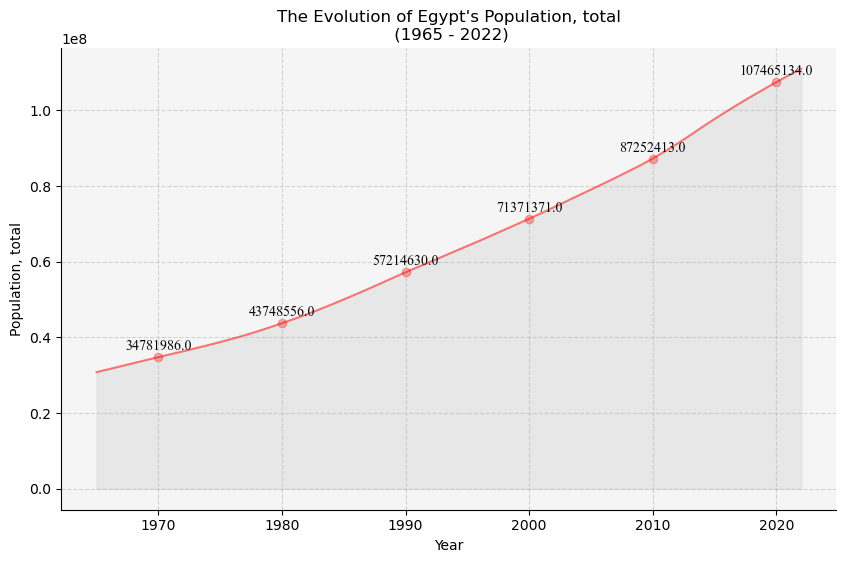

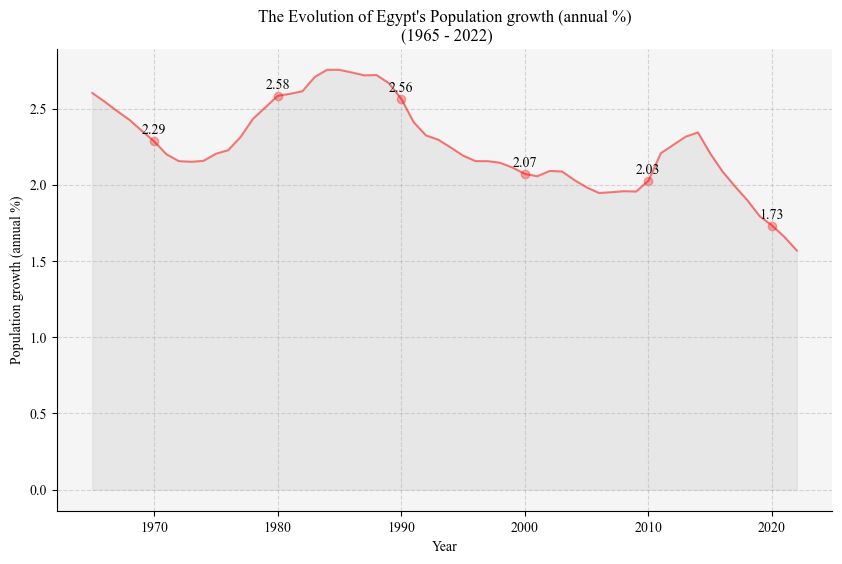

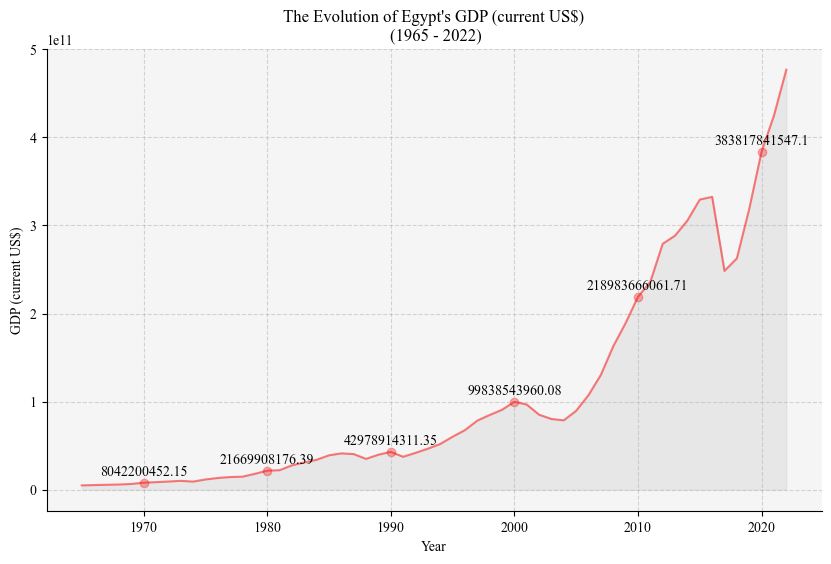

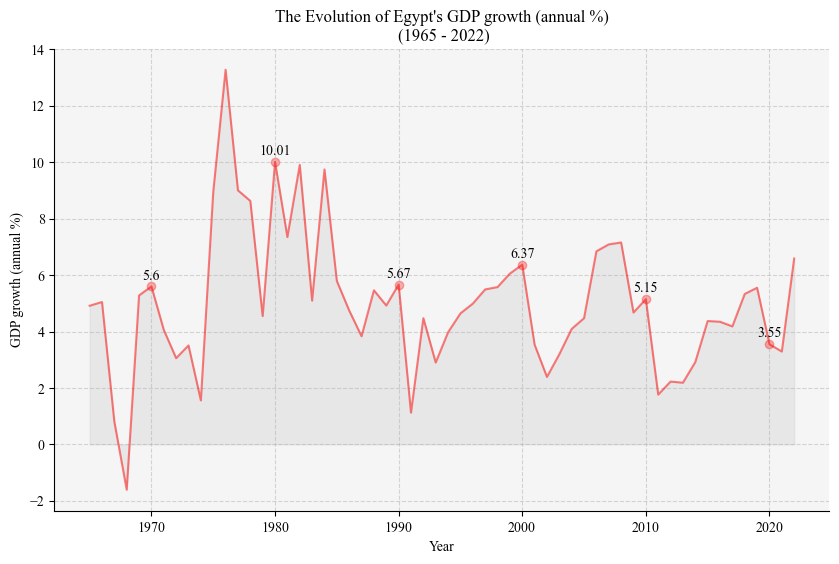

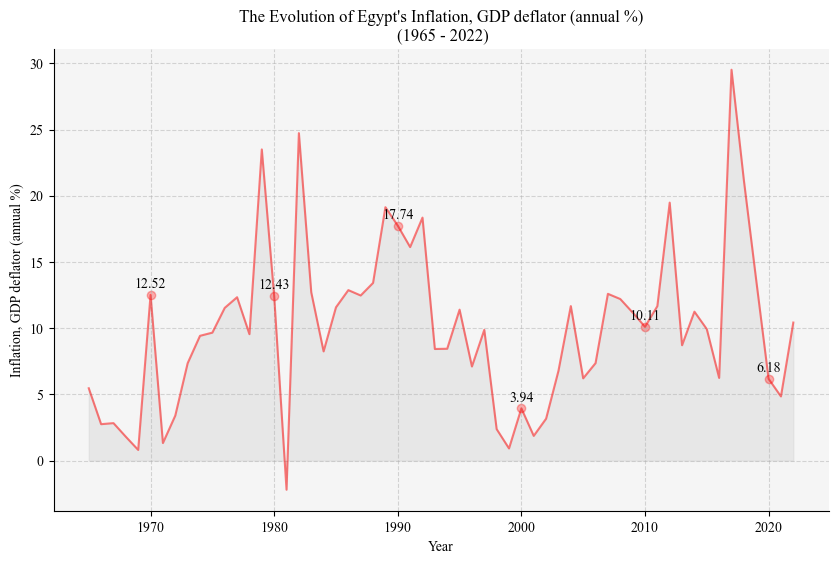

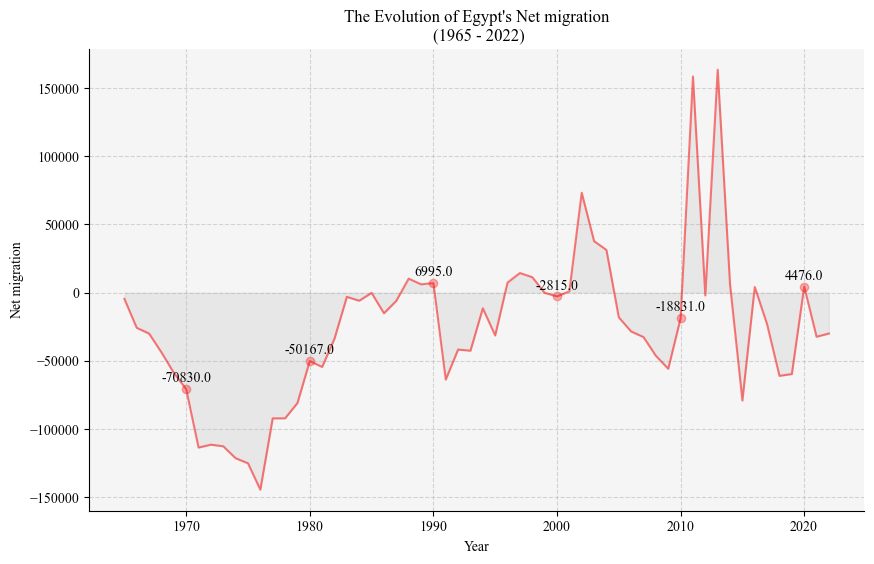

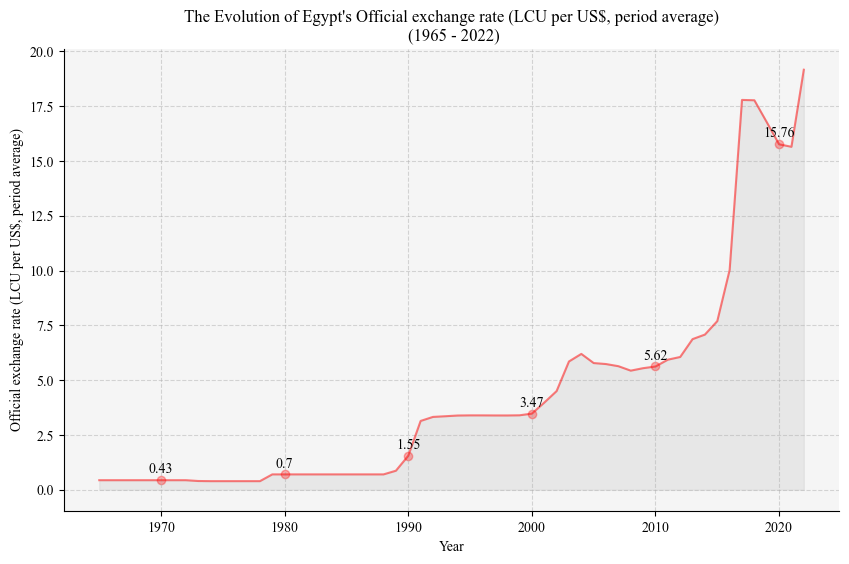

In [15]:
for column in df.columns:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=np.array(df.index[1:], dtype=np.int64), y=np.array(df[column][1:], dtype=np.float64),color = 'red', alpha=0.5)
    plt.fill_between(np.array(df.index[1:], dtype=np.int64), np.array(df[column][1:], dtype=np.float64), color='lightgray', alpha=0.4)
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.xlabel('Year')
    plt.ylabel(df[column][0])
    title = f'The Evolution of Egypt\'s {df[column][0]}\n (1965 - 2022)'
    plt.title(title)
    plt.gca().set_facecolor('whitesmoke')
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.grid(True, linestyle='--', alpha=0.5)
    for i, (year, pop) in enumerate(zip(np.array(df.index[1:], dtype=np.int64), np.array(df[column][1:], dtype=np.float64))):
        if year in [1970,1980,1990,2000,2010,2020]:
            plt.annotate(f"{round(pop, 2)}", xy=(year, pop), textcoords="offset points", xytext=(0,5), ha='center')
    plt.scatter(np.array(df.index[6:], dtype=np.int64)[::10], np.array(df[column][6:], dtype=np.float64)[::10], marker='o', color='r', alpha=0.3, label='Annotated Points')
    #plt.scatter(np.array(df.index[1:], dtype=np.int64)[57], np.array(df[column][1:], dtype=np.float64)[57], marker='o', color='r', alpha=0.3, label='Annotated Points')
    plt.show()

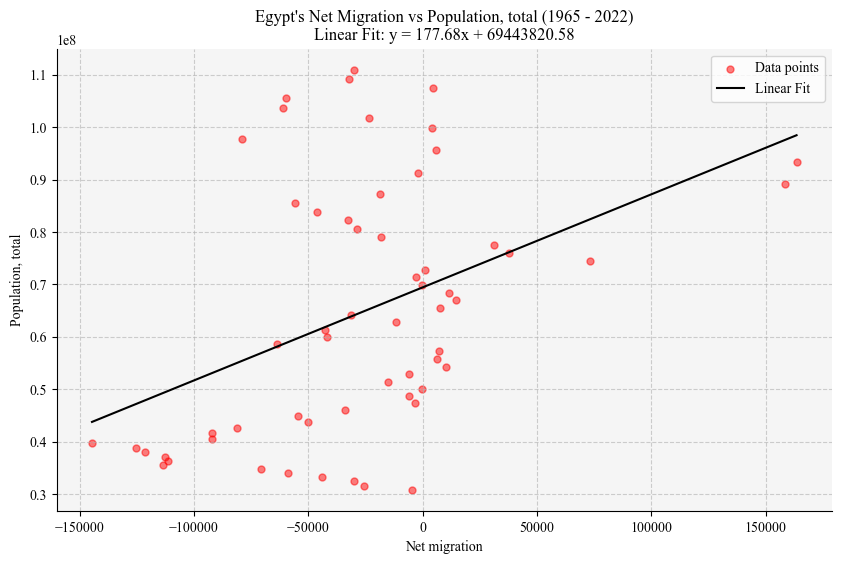

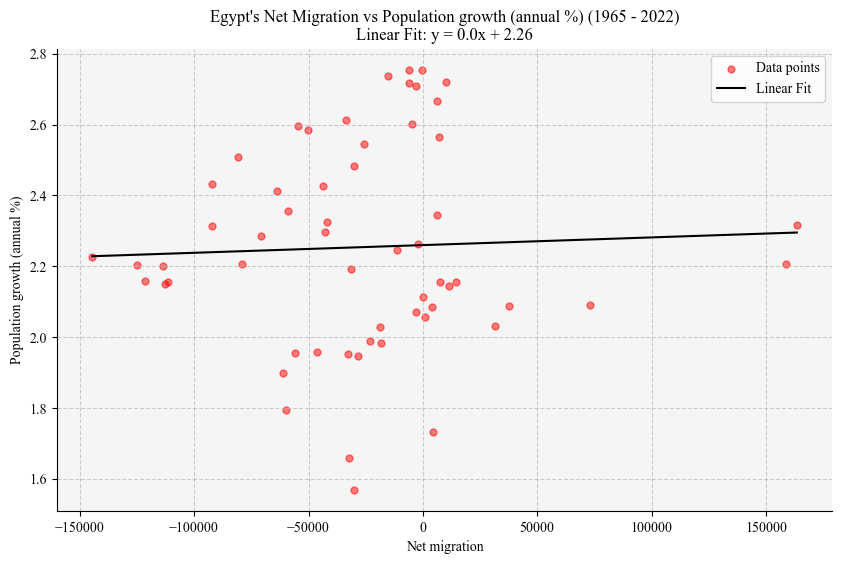

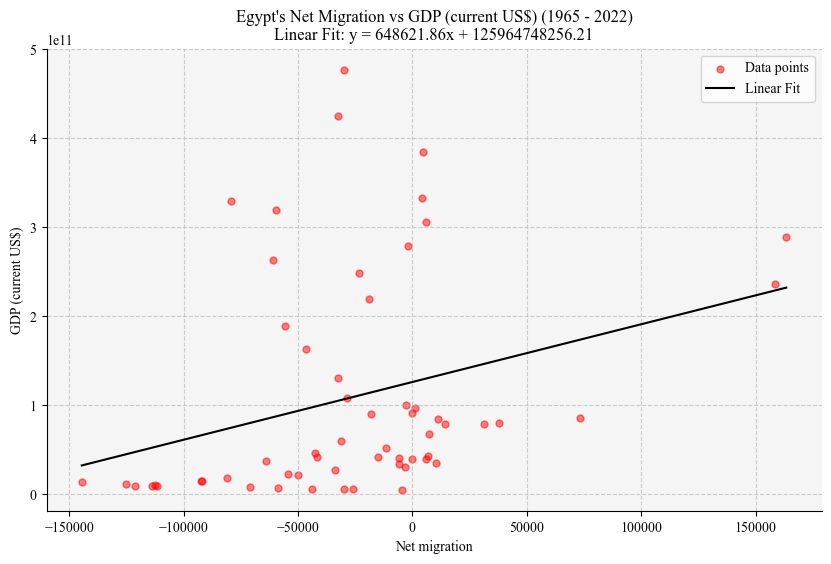

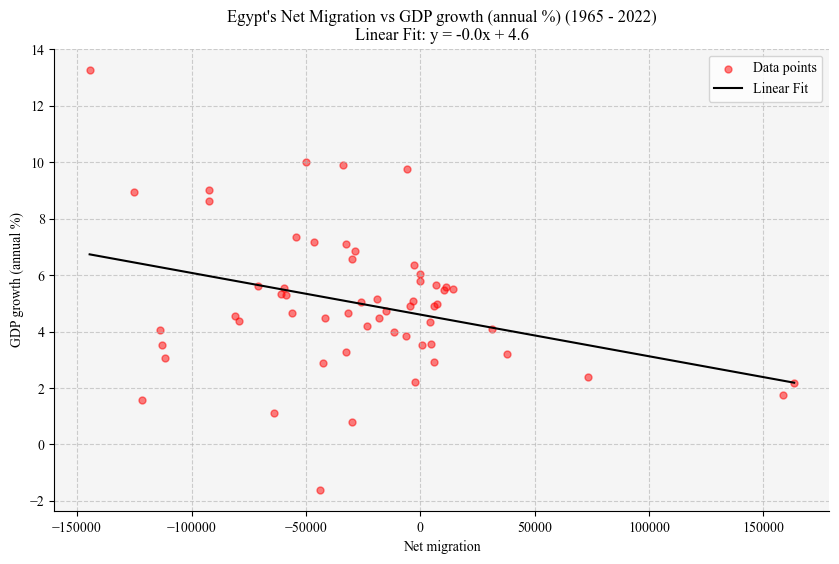

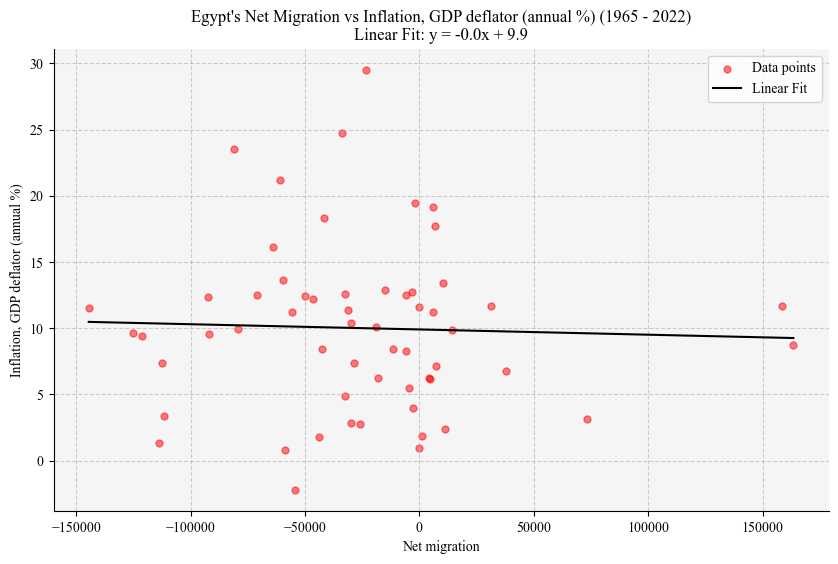

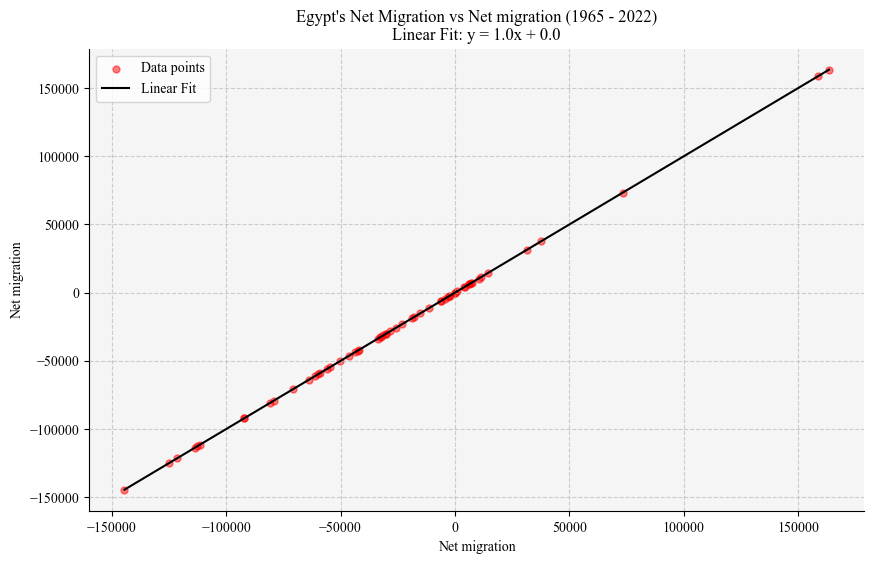

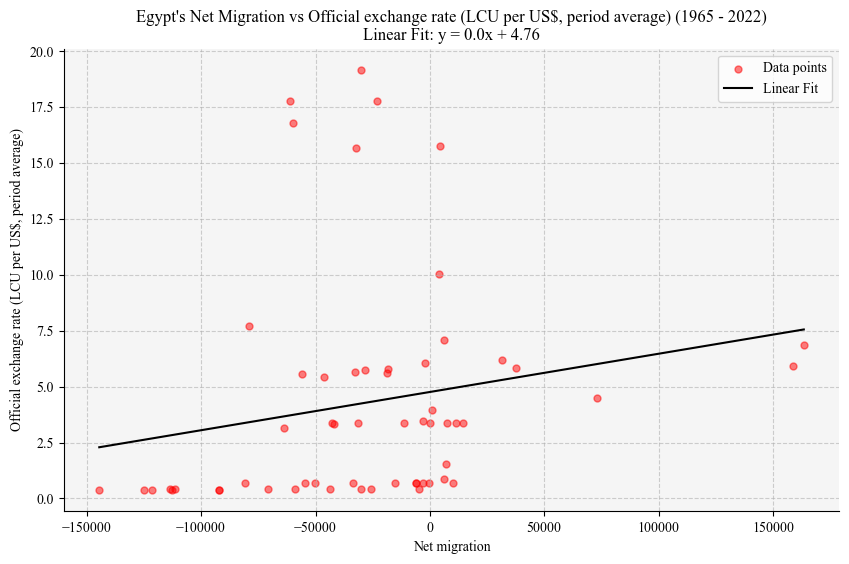

In [16]:
for column in df.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(np.array(df[5][1:], dtype=np.float64), np.array(df[column][1:], dtype=np.float64),color = 'red', marker='o', s=25, alpha=0.5)
    slope, intercept = np.polyfit(np.array(df[5][1:], dtype=np.float64), np.array(df[column][1:], dtype=np.float64), 1)
    sns.lineplot(x = np.array(df[5][1:], dtype=np.float64), y = slope * np.array(df[5][1:], dtype=np.float64) + intercept,color = 'black')
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.xlabel(df[5][0])
    plt.ylabel(df[column][0])
    title = f"Egypt's Net Migration vs {df[column][0]} (1965 - 2022)\nLinear Fit: y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.title(title)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().set_facecolor('whitesmoke')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(["Data points","Linear Fit"])
    plt.show()

In [17]:
for column in df.columns:
    print('Correlation coefficent of Egypt\'s Net migration and ' + df[column][0] + '(1965 - 2022): ')
    print(np.corrcoef(np.array(df[5][1:], dtype=np.float64),np.array(df[column][1:], dtype=np.float64))[1][0])

Correlation coefficent of Egypt's Net migration and Population, total(1965 - 2022): 
0.4173748088137176
Correlation coefficent of Egypt's Net migration and Population growth (annual %)(1965 - 2022): 
0.04283339622688814
Correlation coefficent of Egypt's Net migration and GDP (current US$)(1965 - 2022): 
0.2980826708894402
Correlation coefficent of Egypt's Net migration and GDP growth (annual %)(1965 - 2022): 
-0.33181865878676725
Correlation coefficent of Egypt's Net migration and Inflation, GDP deflator (annual %)(1965 - 2022): 
-0.035495250129198366
Correlation coefficent of Egypt's Net migration and Net migration(1965 - 2022): 
1.0
Correlation coefficent of Egypt's Net migration and Official exchange rate (LCU per US$, period average)(1965 - 2022): 
0.19238123298860166


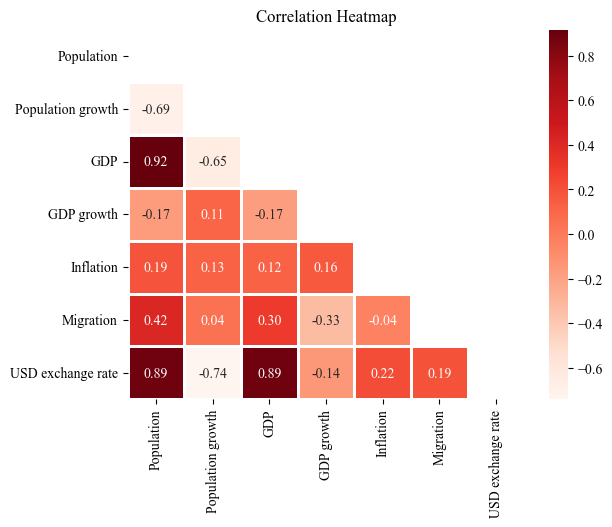

In [18]:
feature_names = ['Population', 'Population growth', 'GDP', 'GDP growth', 'Inflation', 'Migration', 'USD exchange rate']
mask = np.triu(df[1:].corr())
cmap = sns.color_palette("Reds", as_cmap=True)
heatmap = sns.heatmap(df[1:].corr(), mask=mask, linewidths=1, cmap=cmap,
                      annot=True, fmt=".2f",
                      xticklabels=feature_names, yticklabels=feature_names)
plt.title("Correlation Heatmap")
plt.show()

In [19]:
feature_names = ['Population', 'Population growth', 'GDP', 'GDP growth', 'Inflation', 'Net migration', 'USD exchange rate']
correlation_matrix = df[1:].corr()
correlation_matrix.columns = feature_names
mask = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
upper_triangular_matrix = correlation_matrix.mask(mask)
upper_triangular_matrix.set_index(feature_names, inplace=True)
print("Upper Triangular Correlation Matrix:")
upper_triangular_matrix

Upper Triangular Correlation Matrix:


,,,,,,
Population,Population growth,GDP,GDP growth,Inflation,Net migration,USD exchange rate
1.000000,NaN,NaN,NaN,NaN,NaN,NaN
-0.691117,1.000000,NaN,NaN,NaN,NaN,NaN
0.916773,-0.647285,1.000000,NaN,NaN,NaN,NaN
-0.169705,0.110629,-0.173491,1.000000,NaN,NaN,NaN
0.189747,0.126183,0.123287,0.160246,1.000000,NaN,NaN
0.417375,0.042833,0.298083,-0.331819,-0.035495,1.000000,NaN
0.888010,-0.741364,0.889158,-0.142026,0.218798,0.192381,1.0
